# Task 01:
## Iris Flowers Classification ML Project :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data set

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

Total 150 rows and 6 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No NULL values

In [6]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

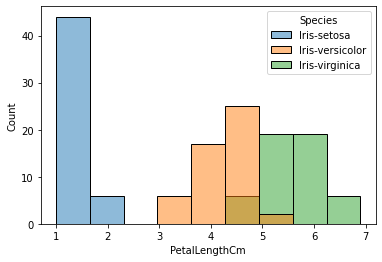

In [8]:
sns.histplot(data=data, x="PetalLengthCm",hue="Species")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

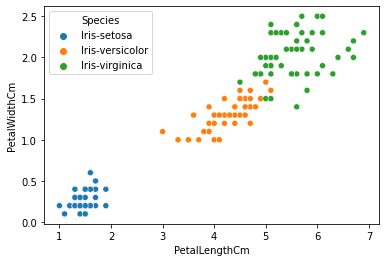

In [9]:
sns.scatterplot(x=data["PetalLengthCm"],y=data['PetalWidthCm'], hue=data['Species'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

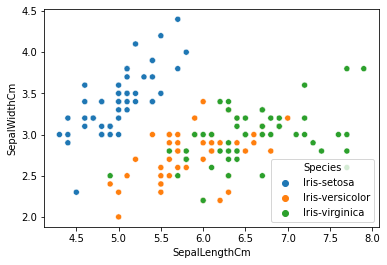

In [10]:
sns.scatterplot(x=data["SepalLengthCm"],y=data['SepalWidthCm'], hue=data['Species'])

In [11]:
data.replace('Iris-setosa',0,inplace=True)
data.replace('Iris-versicolor',1,inplace=True)
data.replace('Iris-virginica',2,inplace=True)

Renaming Species

In [12]:
data['Species'].unique()

array([0, 1, 2], dtype=int64)

In [13]:
X = data.drop(['Species','Id'],axis=1)

In [14]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
Y = data['Species']

In [16]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [19]:
len(X_train)

112

In [20]:
len(X_test)

38

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train,y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
model.score(X_test,y_test)

1.0

Printing Accuracy Matrix

In [25]:
actual = y_test
predict = model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 14]], dtype=int64)

##### Classification report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(actual,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        14

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [28]:
print("enter details")
sepal_length=float(input("sepal_length : "))
sepal_width=float(input("sepal_width : "))
petal_length=float(input("petal_length : "))
petal_width=float(input("petal_width : "))
new_data=np.array([[sepal_length,sepal_width,petal_length,petal_width]])

enter details
sepal_length : 1.5
sepal_width : 2
petal_length : 3
petal_width : 1.5


In [29]:
ans=model.predict(new_data)
if(ans==0):
    print("Iris_setosa")
elif(ans==1):
    print("Iris virginica")
else:
    print("Iris versicolor")

Iris_setosa


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
